# Especialização em Ciência de Dados - PUC-Rio
# Machine Learning
## Exercício 1: Análise Exploratória e Pré-processamento de Dados



---


__Alunos:__ <br>
        Cícero Felipe Ricci Bressane <br>
        José Douglas Nascimento <br>
        Ronaldo Costa <br>
        Victor Mouffron Carvalho Machado

---



# Escolha um dataset simples (preferencialmente do UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/index.php) e treine a análise exploratória e o pré-processamento de dados com os comandos aprendidos em aula#

O dataset escolhido foi obtido no Kaggle no link: https://www.kaggle.com/jealousleopard/goodreadsbooks. Trata-se de um dataset com review de livros da plaforma Goodreads (https://www.goodreads.com/) em que cada linha representa um livro. Os atributos do dataset são:

__bookID__ - Identificador do livro <br>
__title__ - Título do Livro <br>
__authors__ - Autores do livro, separados por hífen <br>
__average_rating__ - Avaliação média <br>
__isbn__ - Código ISBN <br>
__isbn13__ - Código ISBN de 13 dígitos <br>
__language_code__ - Código da língua do livro <br>
__num_pages__ - Número de páginas do livro <br>
__ratings_count__ - Quantidade de avaliações (notas) <br>
__text_reviews_count__ - Quantidade de avaliações em texto <br>

## Vamos começar a análise!##

![Livros](img/livraria.jpg)

## Importar bibliotecas e dataset ##

In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy


# dataset apresenta cinco linhas com mais vírgulas do que o correto
# parâmetro error_bad_lines vai pular essas linhas
df = pd.read_csv('data/books.csv',error_bad_lines = False) 
df.head()

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


## Análise exploratória ##

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


__Análise:__ <br>
Nosso dataset possui 13714 linhas e nenhum campo apresenta valores nulos!

In [15]:
df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


__Análise:__ <br>
As avaliações variam em uma escala de 0 a 5 e a mediana é 3,96.<br>
Parece haver uma inconsistência no número de páginas, pois temos livros com zero páginas!<br>
A maioria das pessoas deixam apenas uma avaliação em nota e não escrevem reviews em texto.

In [16]:
df['language_code'].unique()

array(['eng', 'en-US', 'spa', 'fre', 'en-GB', 'mul', 'ger', 'ara', 'por',
       'grc', 'en-CA', 'enm', 'jpn', 'dan', 'zho', 'nl', 'ita', 'lat',
       'srp', 'rus', 'tur', 'msa', 'swe', 'glg', 'cat', 'wel', 'heb',
       'nor', 'gla', 'ale'], dtype=object)

__Análise:__ <br>

Existem livros de diversas línguas no dataset, mas parece haver algumas incosistências. Temos 'eng','eng-GB','eng-US' e 'eng-CA' como livros de língua inglesa. Mas ao que se referem os livros apenas com 'eng'? Durante o pré-processamento podemos converter todos para um único padrão!

In [17]:
df.corr(method = 'pearson')

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.042510,-0.001610,-0.012872,-0.081236,-0.087670
average_rating,-0.042510,1.000000,0.000453,0.167388,0.041234,0.036695
isbn13,-0.001610,0.000453,1.000000,-0.011723,0.004835,0.007260
# num_pages,-0.012872,0.167388,-0.011723,1.000000,0.028408,0.034171
ratings_count,-0.081236,0.041234,0.004835,0.028408,1.000000,0.863467
text_reviews_count,-0.087670,0.036695,0.007260,0.034171,0.863467,1.000000


__Análise:__ <br>

Variáveis não possuem muita correlação linear, exceto as variáveis __text_reviews_count__ e __ratings_count__.

In [18]:
# autores com maiores médias de review
df.groupby('authors').mean()['average_rating'].nlargest(20)

authors
Aaron Rosenberg-Christopher Cook                                                                            5.0
Aristophanes-F.W. Hall-W.M. Geldart                                                                         5.0
Chris    Green-Chris Wright-Paul Douglas Gardner                                                            5.0
Chris Jiggins-Pablo Andrade-Eduardo Cueva                                                                   5.0
Dennis Adler-R.L. Wilson                                                                                    5.0
Ian        Martin-Katie Elliott                                                                             5.0
James E. Campbell                                                                                           5.0
James E. Ingram-Lori Grove                                                                                  5.0
Jean-Paul Gabilliet-François Gallix-Janice Fiamengo-Raphaelle Costa de Beauregard-Priscilla Mori

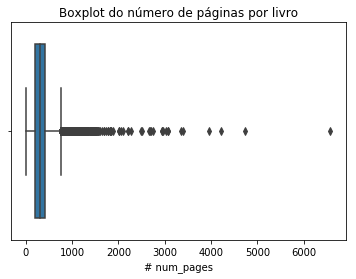

In [19]:
sns.boxplot('# num_pages',data=df)
plt.title('Boxplot do número de páginas por livro')
plt.show()

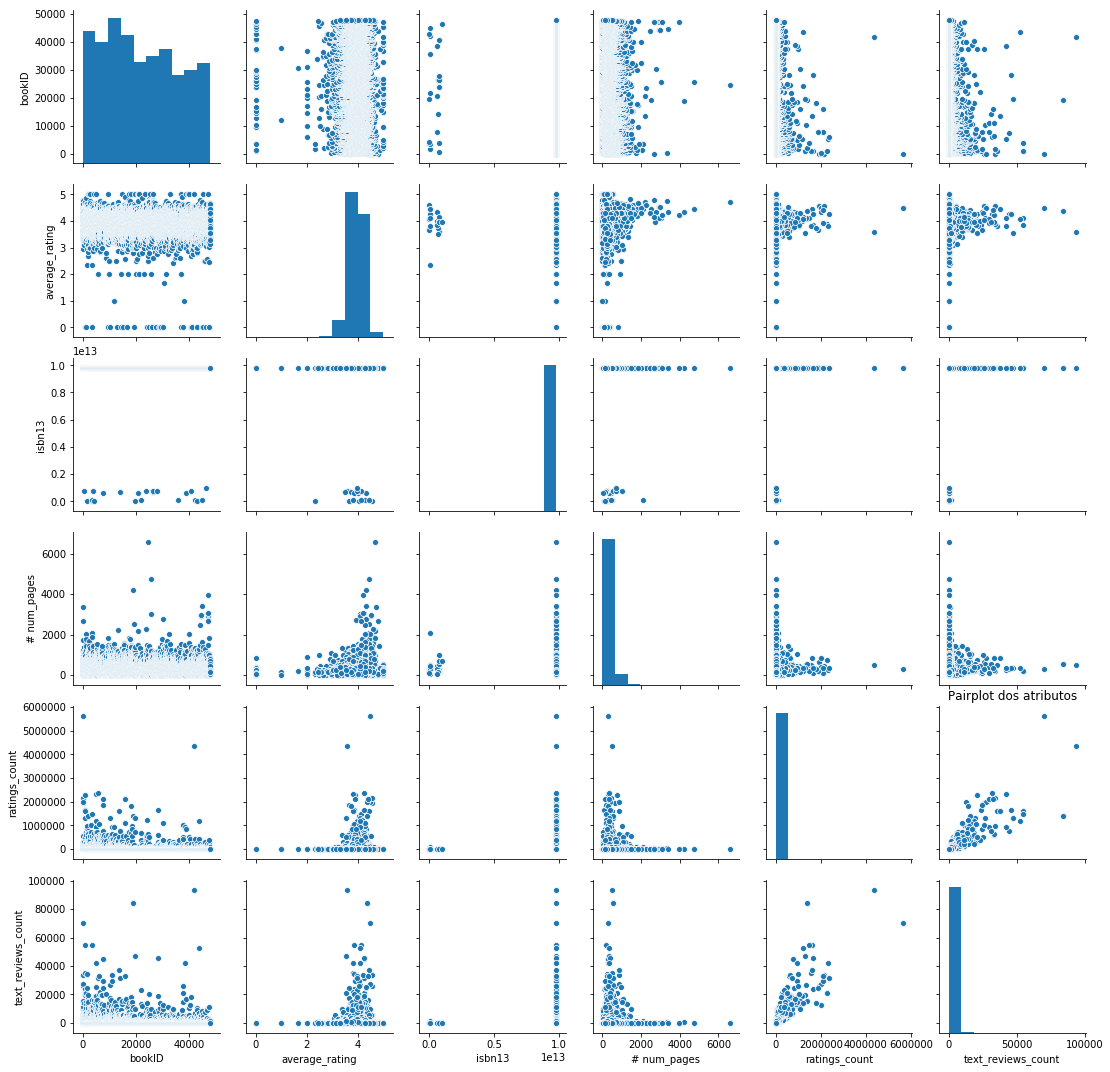

In [20]:
sns.pairplot(df)
plt.title('Pairplot dos atributos')
plt.show()

# Pré-processamento#

__Vamos padronizar os livros de língua inglesa!__

In [21]:
languages_to_convert = ['eng','en-US','en-GB','en-CA']
df.language_code[df['language_code'].isin(languages_to_convert)] = 'en'
df['language_code'].unique()

array(['en', 'spa', 'fre', 'mul', 'ger', 'ara', 'por', 'grc', 'enm',
       'jpn', 'dan', 'zho', 'nl', 'ita', 'lat', 'srp', 'rus', 'tur',
       'msa', 'swe', 'glg', 'cat', 'wel', 'heb', 'nor', 'gla', 'ale'],
      dtype=object)

__Vamos obter o nome do primeiro autor e colocar em uma nova variável!__

In [22]:
df['first_author'] = df['authors'].str.split('-').str[0]
df['first_author'].unique()

array(['J.K. Rowling', 'W. Frederick Zimmerman', 'Douglas Adams', ...,
       'David C. Hendrickson', 'Alisa Kwitney', 'Brian Froud'],
      dtype=object)

__Vamos criar uma variável binária que indica se um livro tem mais de 300 páginas__

In [23]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=300)
df['more_than_300'] = binarizer.fit_transform(df['# num_pages'].values.reshape(-1,1))
df.sample(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,first_author,more_than_300
6814,21111,Tregaron's Daughter,Madeleine Brent,4.13,0385003234,9780385003230,en,251,1486,115,Madeleine Brent,0
2530,7684,Twister,Michael Crichton-Anne-Marie Martin,3.63,0345409701,9780345409706,en,182,17,1,Michael Crichton,0
12240,41861,John Paul George & Ben,Lane Smith,4.21,0786848936,9780786848935,en,40,3412,379,Lane Smith,0
8912,28634,Immortality,Milan Kundera-Peter Kussi,4.13,057114456X,9780571144563,en,400,20908,765,Milan Kundera,1
10077,32523,Hide (Detective D.D. Warren #2),Lisa Gardner,4.15,0553804324,9780553804324,en,313,25636,1429,Lisa Gardner,1
8951,28730,Fiddler Fair,Mercedes Lackey,3.90,0671878662,9780671878665,en,272,3256,27,Mercedes Lackey,0
8211,25743,The Slave,Isaac Bashevis Singer-Cecil Hemley,4.17,0374506809,9780374506803,en,320,1952,147,Isaac Bashevis Singer,1
11025,36507,The Azathoth Cycle: Tales of the Blind Idiot God,Robert M. Price-Edward Pickman Derby-Peter Can...,3.75,1568820402,9781568820408,en,260,122,5,Robert M. Price,0
12771,43919,Faerie Tale,Raymond E. Feist,3.87,0586071393,9780586071397,en,490,7700,339,Raymond E. Feist,1
8473,26950,The Custom of the Country,Edith Wharton-Linda Wagner-Martin,4.03,0143039709,9780143039709,en,370,7397,699,Edith Wharton,1


__Normalizando o número de ratings__

In [24]:
from sklearn.preprocessing import MinMaxScaler


df['ratings_normalized'] = MinMaxScaler().fit_transform(df['ratings_count'].values.reshape(-1,1))
df.sample(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,first_author,more_than_300,ratings_normalized
4446,13486,How to Think Theologically,Howard W. Stone-James O. Duke,3.65,0800638182,9780800638184,en,142,222,20,Howard W. Stone,0,3.943209e-05
12863,44244,The Beleaguered City: The Vicksburg Campaign,Shelby Foote,4.22,0679601708,9780679601708,en,368,258,24,Shelby Foote,1,4.582649e-05
7756,24283,Les Misérables,Victor Hugo-Charles E. Wilbour-James K. Robinson,4.29,0449300021,9780449300022,en,400,4565,340,Victor Hugo,1,8.108446e-04
4351,13146,Black Friday,James Patterson,3.67,0446609323,9780446609326,en,480,9539,214,James Patterson,1,1.694337e-03
2547,7724,The Metamorphosis and Other Stories,Franz Kafka-Stanley Appelbaum,4.03,0486290301,9780486290300,en,88,2404,122,Franz Kafka,0,4.270034e-04
10839,35484,The Ring And The Fire: Stories From Wagner's N...,Clyde Robert Bulla,3.67,0690702523,9780690702521,en,135,3,1,Clyde Robert Bulla,0,5.328661e-07
7767,24307,The Pen Is Mightier Than The Sword (The Amazin...,Anne Mazer-Monica Gesue,3.96,0439178827,9780439178822,en,128,1063,19,Anne Mazer,0,1.888122e-04
8428,26666,Things Pondered: From the Heart of a Lesser Woman,Beth Moore,4.09,0805427317,9780805427318,en,160,282,24,Beth Moore,0,5.008941e-05
9719,31319,They Do It With Mirrors (Miss Marple #6),Agatha Christie,3.75,0007120877,9780007120871,en,284,415,46,Agatha Christie,0,7.371315e-05
10063,32505,The Closers (Harry Bosch #11; Harry Bosch Uni...,Michael Connelly,4.12,0446699551,9780446699556,en,432,28571,1215,Michael Connelly,1,5.074839e-03


# Agora pesquise outras operações ou comandos (não estudados em sala) e realize outros tipos de técnicas de análise exploratória e pré-processamento de dados.#

__Diversos comandos utilizados durante esse notebook não foram vistos em sala. Mas vamos ver mais alguns:__

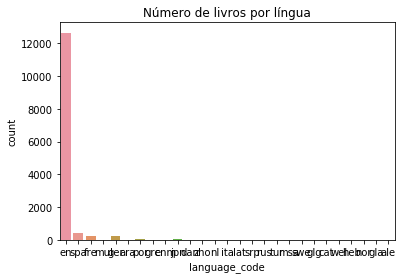

In [25]:
sns.countplot(x='language_code',data=df)
plt.title("Número de livros por língua")
plt.show()

__Isso não ficou muito bom, vamos tentar rotacionar os labels do eixo x!__

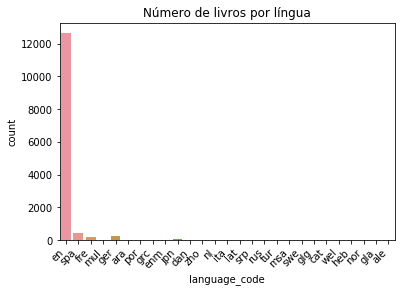

In [26]:
sns.countplot(x='language_code',data=df)
plt.title("Número de livros por língua")
plt.xticks(rotation=45, ha='right')
plt.show()

__Bem melhor! Agora vamos plotar a matriz de correlações que fizemos acima de maneira mais visual usando o seaborn!__

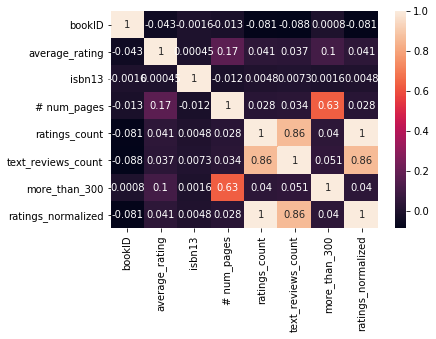

In [27]:
sns.heatmap(df.corr(),annot=True)

__Além dos métodos vistos em sala para pré-processamento, temos também o RobustScaler, que lida bem com outliers, diferentemente do MinMaxScaler. Esse método remove a mediana e "escala" os dados de acordo com o a amplitude interquartílica. Mais informações: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html__ 

In [28]:
from sklearn.preprocessing import RobustScaler


df['ratings_robust'] = RobustScaler().fit_transform(df['ratings_count'].values.reshape(-1,1))
df.sample(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,first_author,more_than_300,ratings_normalized,ratings_robust
5438,16286,The Magus,John Fowles,4.05,0316296198,9780316296199,en,656,36909,1825,John Fowles,1,0.006556,7.786339
12613,43377,The Trial of Henry Kissinger,Christopher Hitchens,3.96,1859843980,9781859843987,en,161,2485,176,Christopher Hitchens,0,0.000441,0.398025
2840,8765,I Feel Bad About My Neck: And Other Thoughts o...,Nora Ephron,3.68,0307264556,9780307264558,en,137,34909,4423,Nora Ephron,0,0.006201,7.357085
9882,31898,Woody Allen and Philosophy: [You Mean My Whole...,Mark T. Conard-Aeon J. Skoble-Tom Morris-Willi...,3.77,0812694538,9780812694536,en,250,282,7,Mark T. Conard,0,0.000050,-0.074797
6010,17961,Collected Fictions,Jorge Luis Borges-Andrew Hurley,4.58,0140286802,9780140286809,en,565,18072,766,Jorge Luis Borges,1,0.003210,3.743414
5267,15779,Sideways Stories from Wayside School (Wayside ...,Louis Sachar-Adam McCauley,4.15,0747571775,9780747571773,en,144,79394,1754,Louis Sachar,0,0.014102,16.904759
6755,20781,Aesop's Fables,Aesop-Ann McGovern,4.05,0590438808,9780590438808,en,80,107,10,Aesop,0,0.000019,-0.112357
1267,3757,Doctor No (James Bond #6),Ian Fleming,3.77,0142002038,9780142002032,en,309,11860,487,Ian Fleming,1,0.002107,2.410152
4687,13985,By Slanderous Tongues (Doubled Edge #3),Mercedes Lackey-Roberta Gellis,3.89,1416521070,9781416521075,en,544,691,19,Mercedes Lackey,1,0.000123,0.012985
10622,34627,Soldiers of Destruction: The SS Death's Head D...,Charles W. Sydnor Jr.,4.00,0691008531,9780691008530,en,375,67,7,Charles W. Sydnor Jr.,1,0.000012,-0.120942


# O que você aprendeu sobre este dataset?#

1) A maioria dos livros é de língua inglesa <br>
2) Não há dados faltantes <br>
3) Há inconsistências, como livros com 0 páginas. <br>
4) A maioria das pessoas deixam apenas uma avaliação em nota e não escrevem reviews em texto. <br>
5) Os rating variam de 0 a 5. <br>
6) A mediana do número de páginas de um livro no dataset é de 301. <br>